In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [2]:
fidcov = np.load('Run_062718/bolp_21p0_0.npz')
fidvd = np.load('Run_062718/bolp_21p0_0_vd.npz')

In [3]:
print fidcov.files
print fidvd.files

['func_all', 'param', 'func_all_cov']
['vpf', 'deltasigma']


In [4]:
cov = fidcov['func_all_cov'][0]+np.cov(fidcov['func_all'].T)
cov[40:60,40:60] += np.cov(fidvd['vpf'].T)
cov[20:40,20:40] += np.cov(fidvd['deltasigma'].T)

In [5]:
cov

array([[  1.00314349e-09,  -4.88273915e-06,   1.24384685e-05, ...,
          9.79369373e-13,   1.09355540e-11,   4.06374138e-11],
       [ -4.88273915e-06,   8.21913360e+03,   1.16044987e+03, ...,
          1.01471132e-04,   1.88943928e-04,   8.90542680e-04],
       [  1.24384685e-05,   1.16044987e+03,   5.54841857e+03, ...,
          6.27532530e-05,   8.55897410e-05,   2.06834132e-04],
       ..., 
       [  9.79369373e-13,   1.01471132e-04,   6.27532530e-05, ...,
          2.34655770e-09,   9.81496237e-10,   2.54144668e-09],
       [  1.09355540e-11,   1.88943928e-04,   8.55897410e-05, ...,
          9.81496237e-10,   1.32140693e-09,   3.29191959e-09],
       [  4.06374138e-11,   8.90542680e-04,   2.06834132e-04, ...,
          2.54144668e-09,   3.29191959e-09,   1.71975564e-08]])

In [6]:
cov_w = cov[:20,:20]
cov_wd = cov[:40,:40]
cov_wv = np.block([[cov[:20,:20],cov[:20,40:60]],\
              [cov[40:60,:20],cov[40:60,40:60]]])
cov_wc = np.block([[cov[:20,:20],cov[:20,60:]],\
              [cov[60:,:20],cov[60:,60:]]])
cov_wdv = cov[:60,:60]
cov_wdc = np.block([[cov[:40,:40],cov[:40,60:]],\
              [cov[60:,:40],cov[60:,60:]]])
cov_wvc = np.block([[cov[:20,:20],cov[:20,40:]],\
              [cov[40:,:20],cov[40:,40:]]])
cov_wdvc = cov

In [7]:
def eig_analysis(cov):
    order = np.argsort(-np.linalg.eig(cov)[0])
    plt.semilogy()
    plt.grid(axis=u'y')
    plt.plot(np.linalg.eig(cov)[0][order]/np.linalg.eig(cov)[0][order][0],'.')
    plt.xlabel('n')
    plt.ylabel('nth largest eigenvalue')

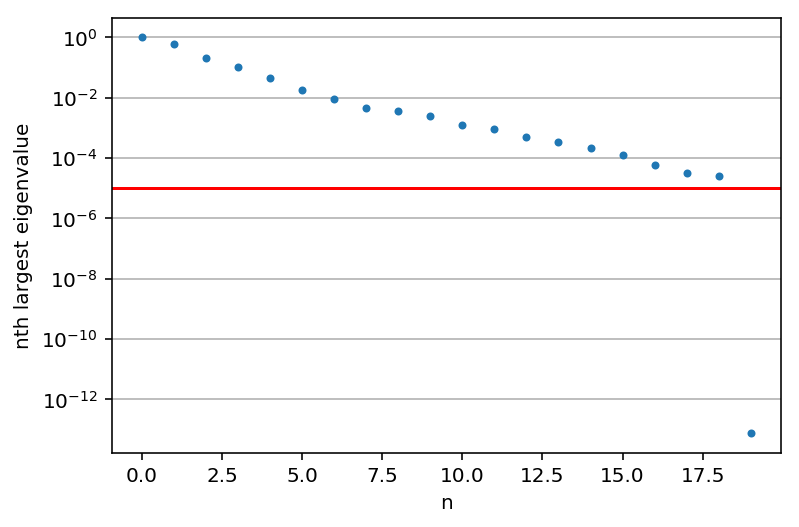

In [8]:
eig_analysis(cov_w)
plt.axhline(1e-5,color='r')
inv_cov_w = np.linalg.pinv(cov_w,rcond=1e-5)

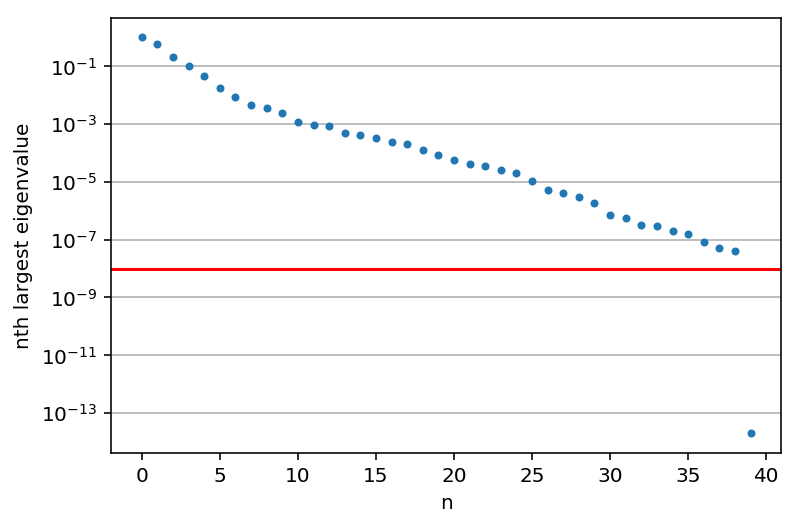

In [10]:
eig_analysis(cov_wd)
plt.axhline(1e-8,color='r')
inv_cov_wd = np.linalg.pinv(cov_wd,rcond=1e-8)

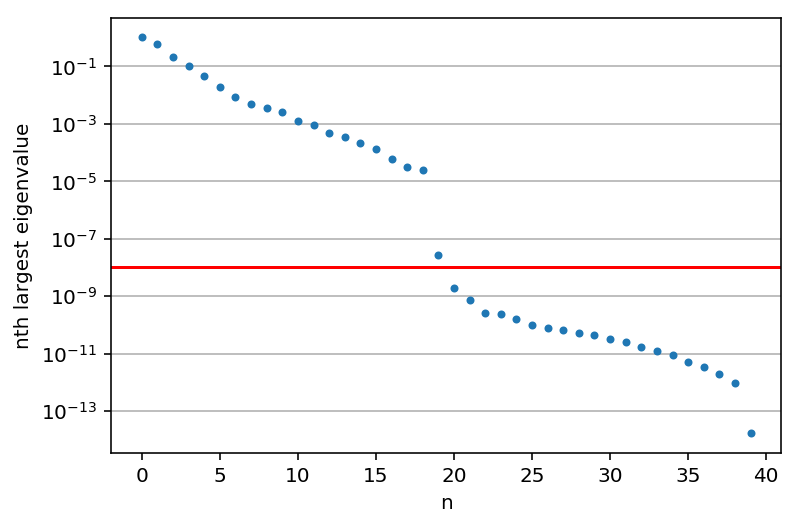

In [12]:
eig_analysis(cov_wv)
plt.axhline(1e-8,color='r')
inv_cov_wv = np.linalg.pinv(cov_wv,rcond=1e-8)

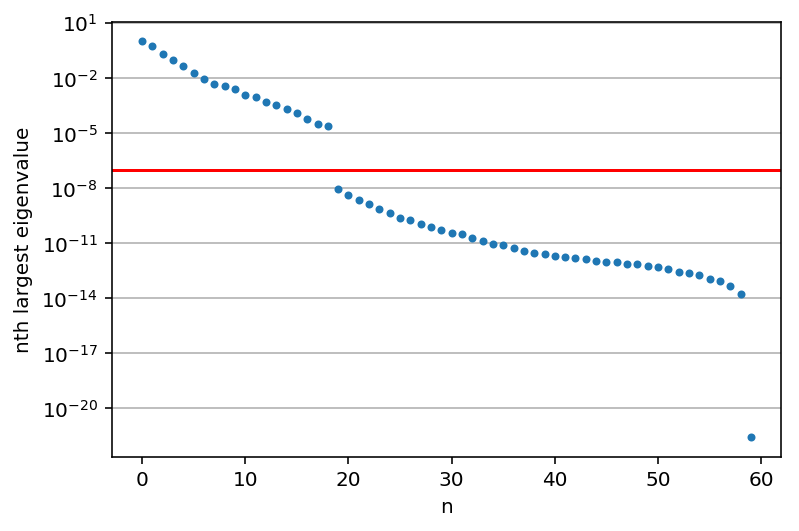

In [14]:
eig_analysis(cov_wc)
plt.axhline(1e-7,color='r')
inv_cov_wc = np.linalg.pinv(cov_wc,rcond=1e-7)

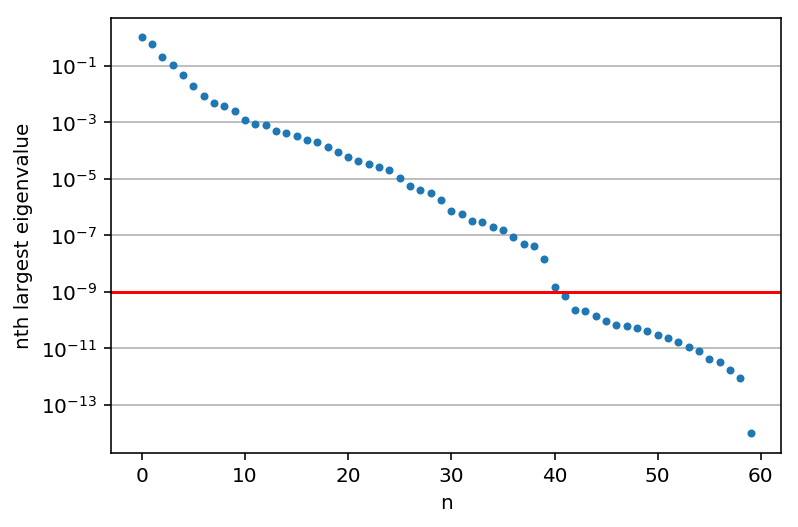

In [16]:
eig_analysis(cov_wdv)
plt.axhline(1e-9,color='r')
inv_cov_wdv = np.linalg.pinv(cov_wdv,rcond=1e-9)

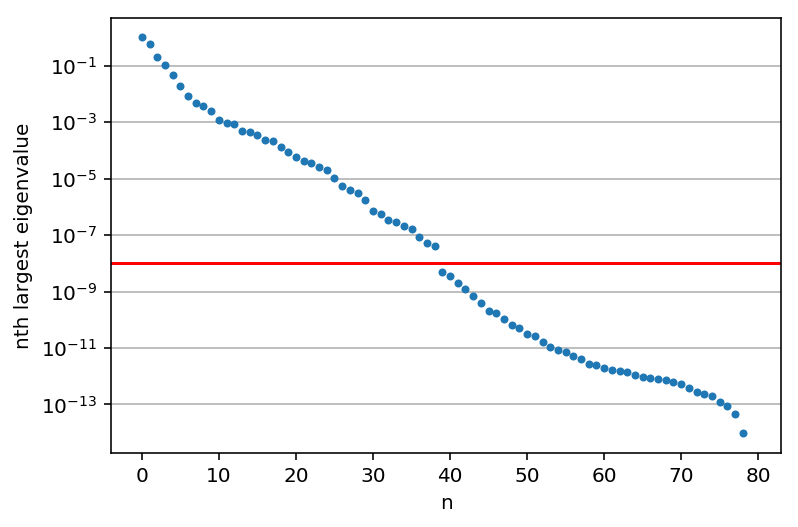

In [18]:
eig_analysis(cov_wdc)
plt.axhline(1e-8,color='r')
inv_cov_wdc = np.linalg.pinv(cov_wdc,rcond=1e-8)

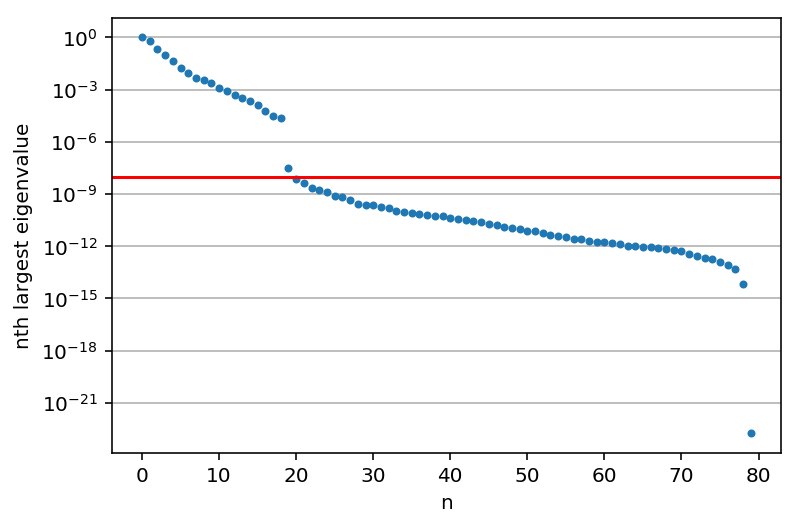

In [19]:
eig_analysis(cov_wvc)
plt.axhline(1e-8,color='r')
inv_cov_wvc = np.linalg.pinv(cov_wvc,rcond=1e-8)

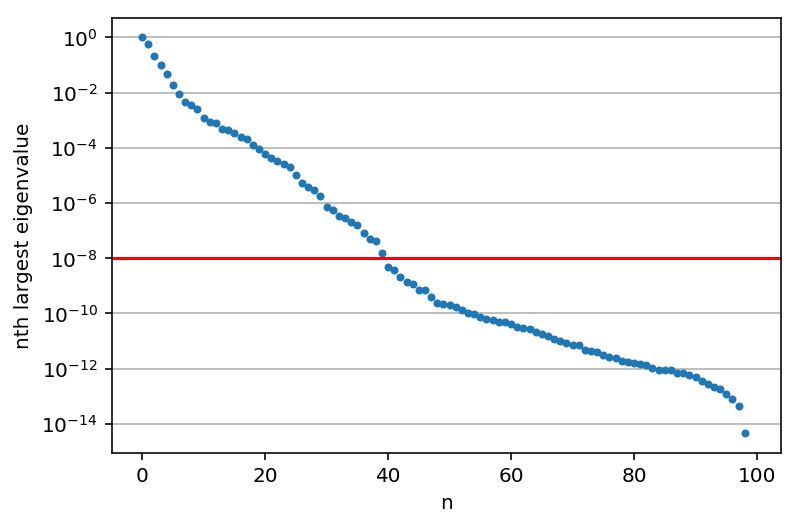

In [20]:
eig_analysis(cov_wdvc)
plt.axhline(1e-8,color='r')
inv_cov_wdvc = np.linalg.pinv(cov_wdvc,rcond=1e-8)

In [21]:
dfdp = np.load('Run_062718/dfdp_bolp_21p0_um0_tcub_alpha07.npz')

In [22]:
dfdp.files

['dfdp_561', 'dfdp_948', 'dfdp_361', 'dfdp_865', 'dfdp_932']

In [23]:
def chop_dfdp(dfdp,comp):
    if comp=='w':
        return dfdp[:,:20]
    elif comp=='wd':
        return dfdp[:,:40]
    elif comp=='wv':
        return np.block([dfdp[:,:20],dfdp[:,40:60]])
    elif comp=='wc':
        return np.block([dfdp[:,:20],dfdp[:,60:]])
    elif comp=='wdv':
        return dfdp[:,:60]
    elif comp=='wdc':
        return np.block([dfdp[:,:40],dfdp[:,60:]])
    elif comp=='wvc':
        return np.block([dfdp[:,:20],dfdp[:,40:]])
    elif comp=='wdvc':
        return dfdp

In [24]:
def calc_fisher(dfdp, invcov):
    fmatrix = np.dot(dfdp,np.dot(invcov,dfdp.T))
    return fmatrix

In [25]:
def calc_1sigma(fisher):
    return np.sqrt(np.linalg.inv(fisher).diagonal())

In [26]:
def all_fisher(name):
    fisher_list = []
    fisher_list.append(calc_fisher(chop_dfdp(dfdp[name],'w'),inv_cov_w))
    fisher_list.append(calc_fisher(chop_dfdp(dfdp[name],'wd'),inv_cov_wd))
    fisher_list.append(calc_fisher(chop_dfdp(dfdp[name],'wv'),inv_cov_wv))
    fisher_list.append(calc_fisher(chop_dfdp(dfdp[name],'wc'),inv_cov_wc))
    fisher_list.append(calc_fisher(chop_dfdp(dfdp[name],'wdv'),inv_cov_wdv))
    fisher_list.append(calc_fisher(chop_dfdp(dfdp[name],'wdc'),inv_cov_wdc))
    fisher_list.append(calc_fisher(chop_dfdp(dfdp[name],'wvc'),inv_cov_wvc))
    fisher_list.append(calc_fisher(chop_dfdp(dfdp[name],'wdvc'),inv_cov_wdvc))
    return fisher_list

In [27]:
def all_1sigma(fisher_list):
    sigma_list = []
    for fisher in fisher_list:
        sigma_list.append(calc_1sigma(fisher))
    return np.array(sigma_list)

In [28]:
comb_list = [r'$w_p$',r'$w_p+\Delta\Sigma$',r'$w_p+vpf$',r'$w_p+P(N_{cic})$',\
             r'$w_p+\Delta\Sigma+vpf$',r'$w_p+\Delta\Sigma+P(N_{cic})$',r'$w_p+vpf+P(N_{cic})$',\
             r'$w_p+\Delta\Sigma+vpf+P(N_{cic})$']

In [29]:
param_list = [r'$\alpha$', r'$logM_1$', r'$\sigma_{logM}$', r'$logM_0$', r'$logM_{min}$', r'$A_{cen}$', r'$A_{sat}$']

In [30]:
all_1sigma_361 = all_1sigma(all_fisher('dfdp_361'))
all_1sigma_561 = all_1sigma(all_fisher('dfdp_561'))
all_1sigma_865 = all_1sigma(all_fisher('dfdp_865'))
all_1sigma_932 = all_1sigma(all_fisher('dfdp_932'))
all_1sigma_948 = all_1sigma(all_fisher('dfdp_948'))

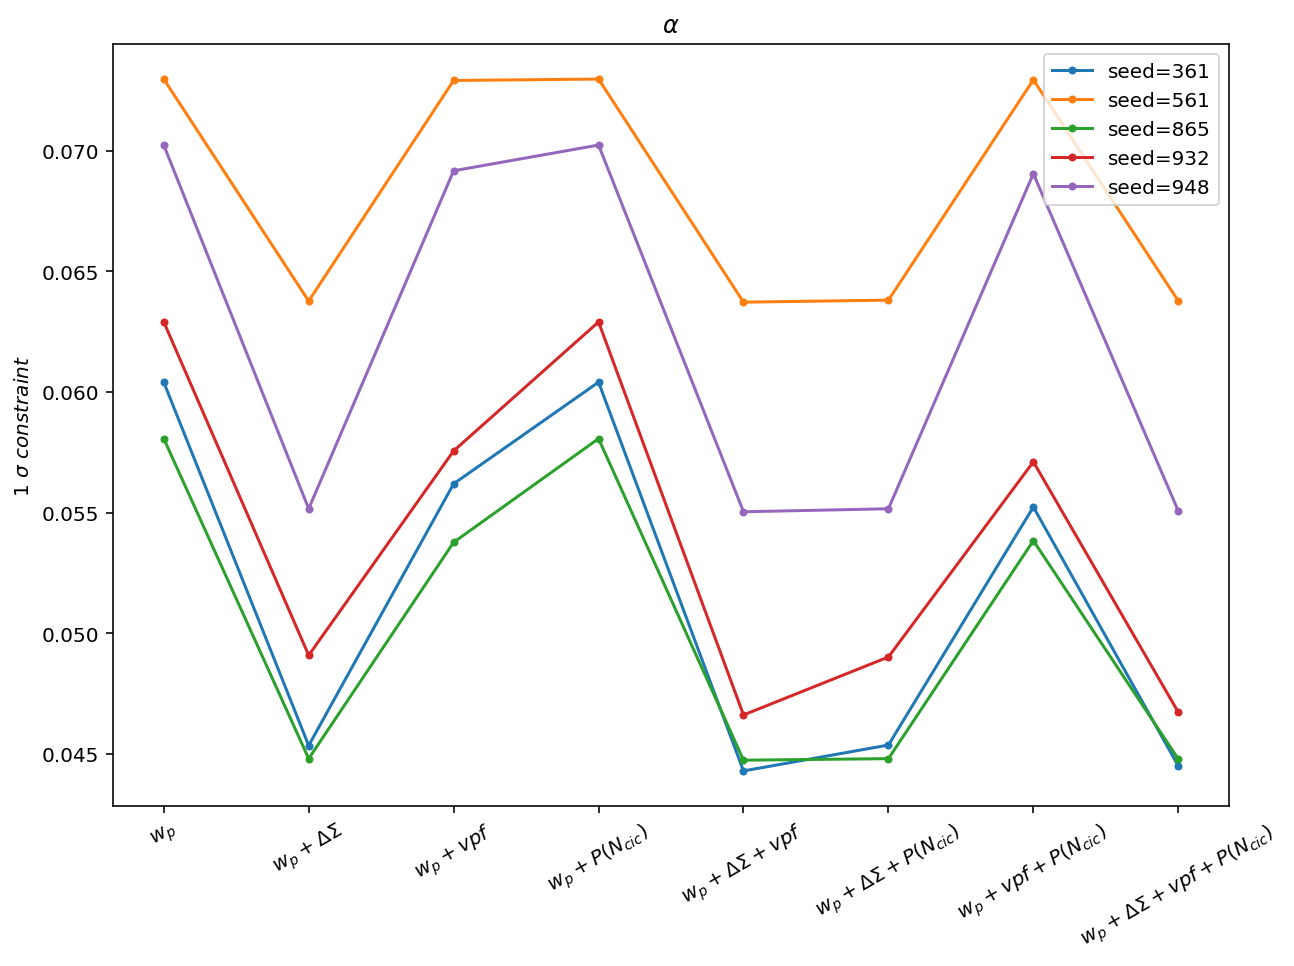

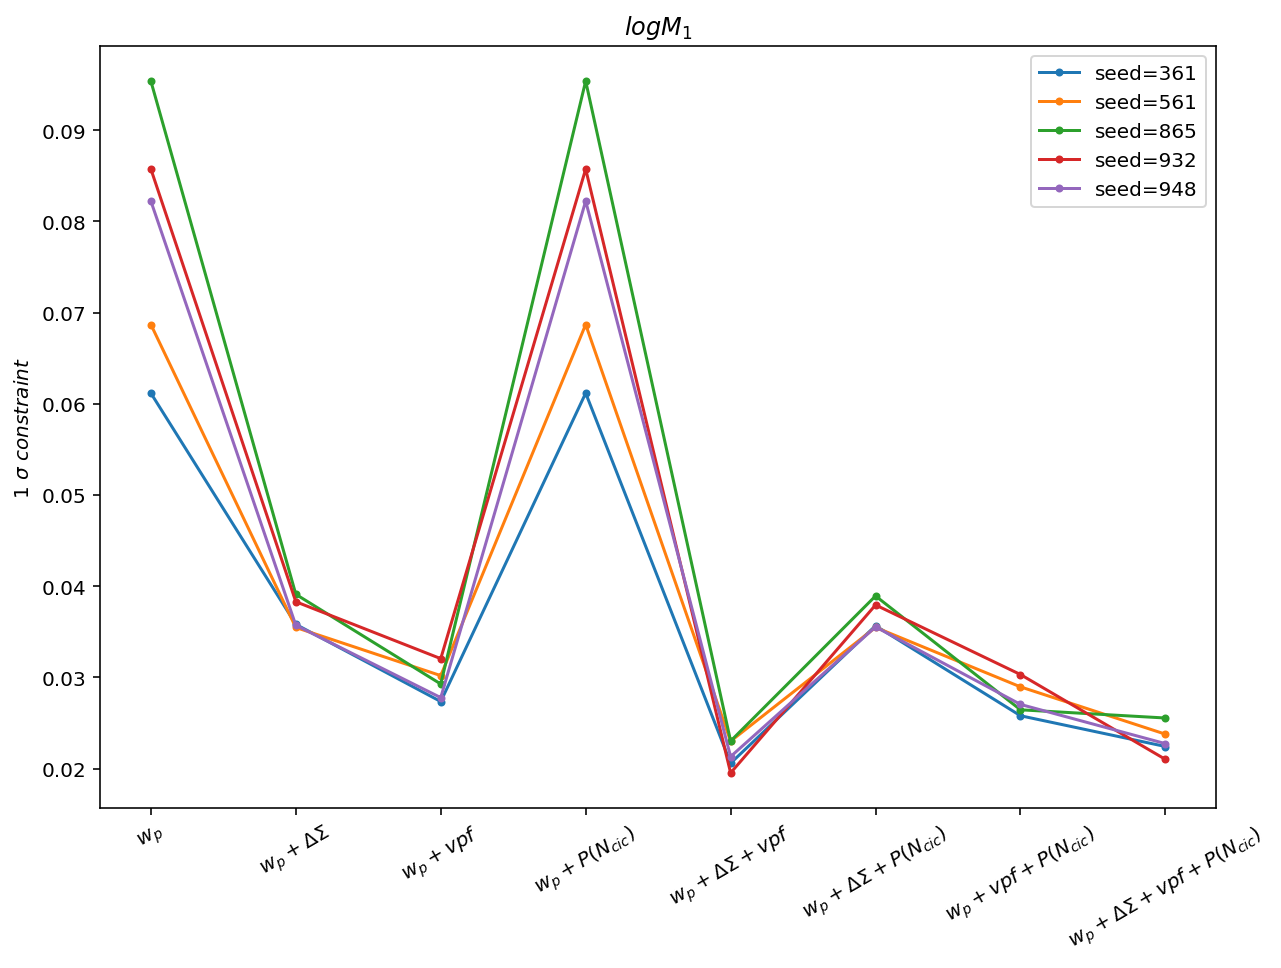

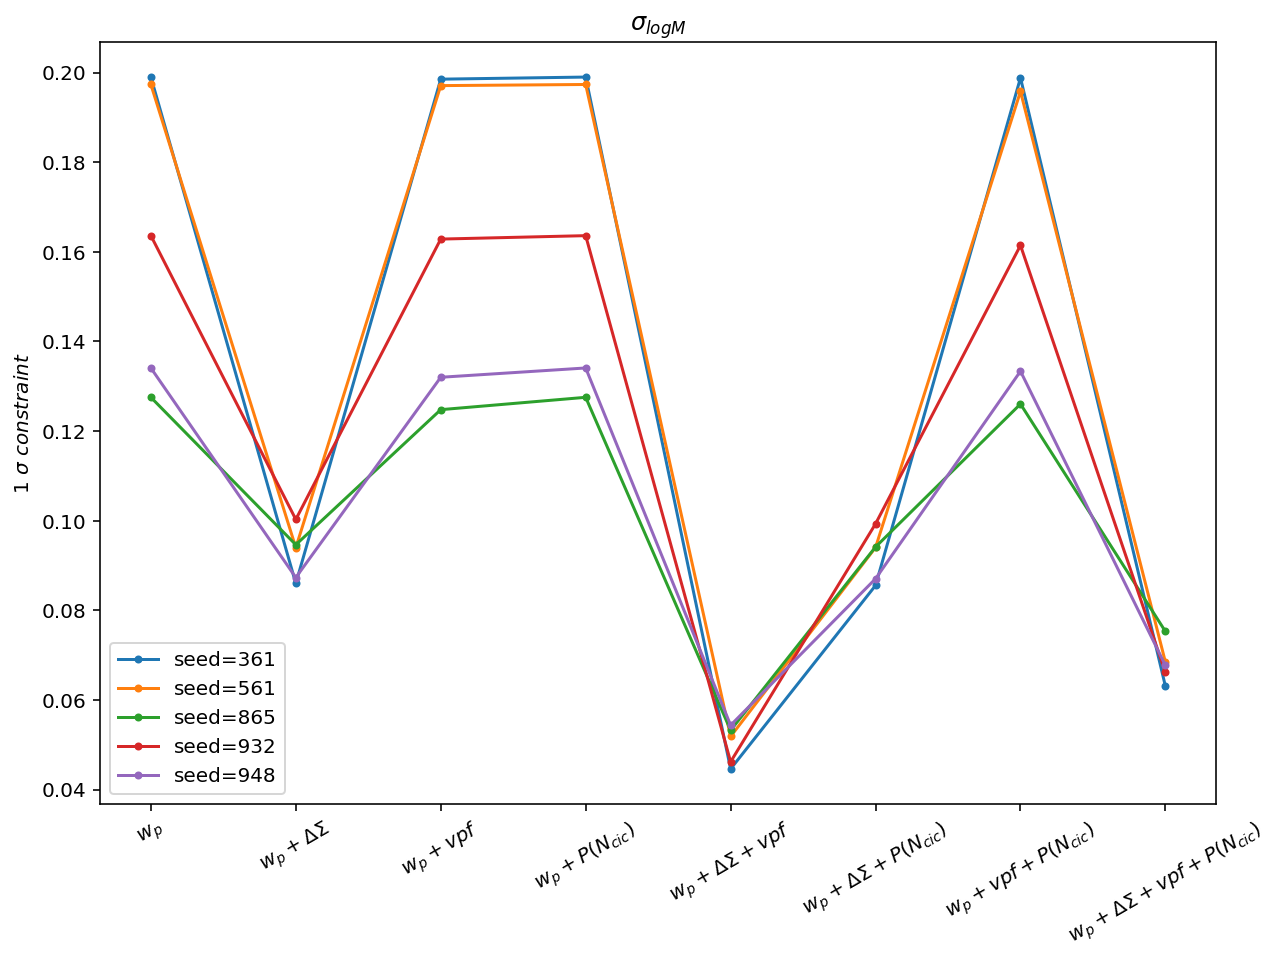

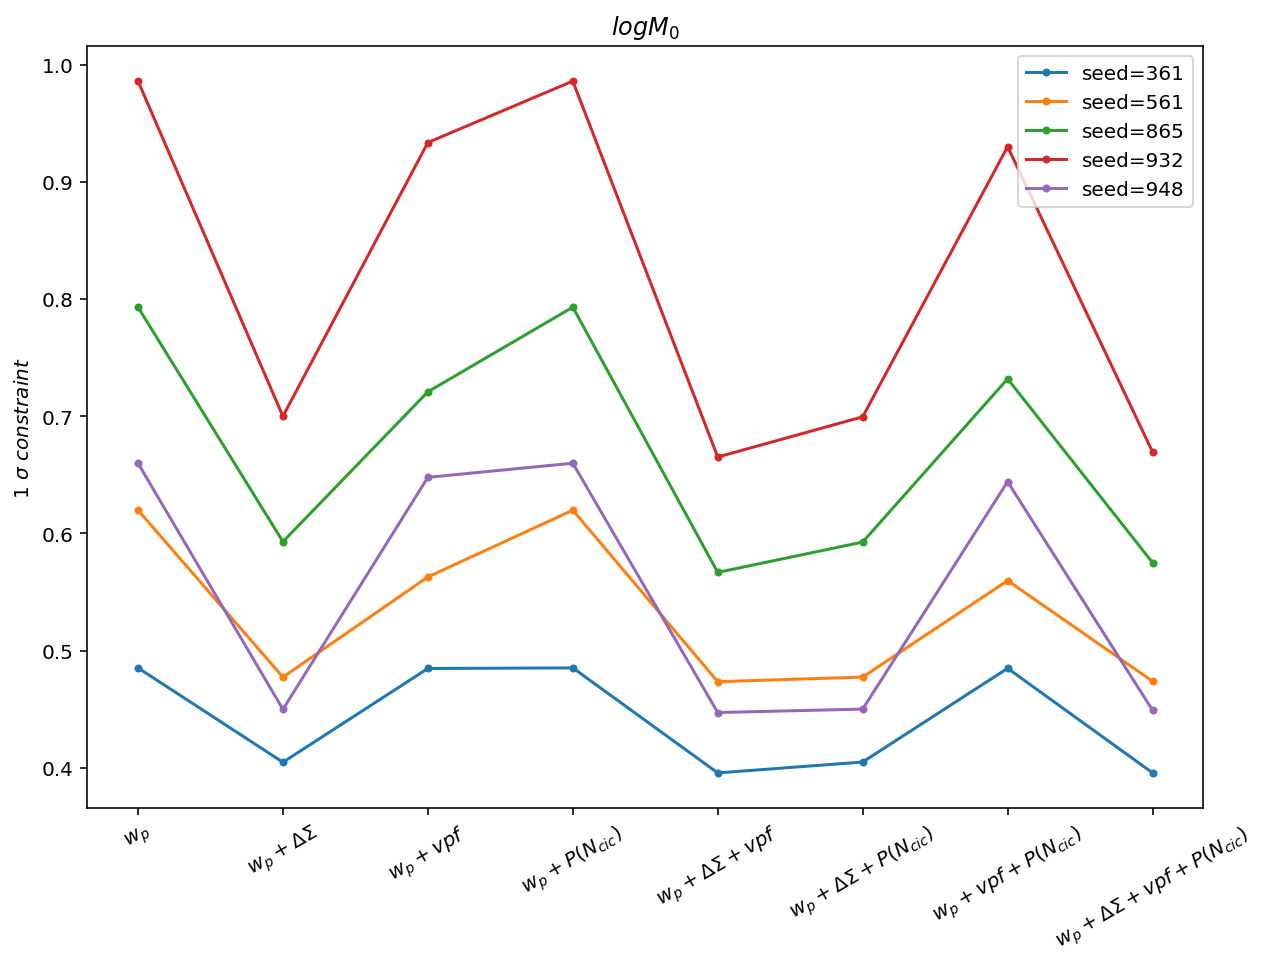

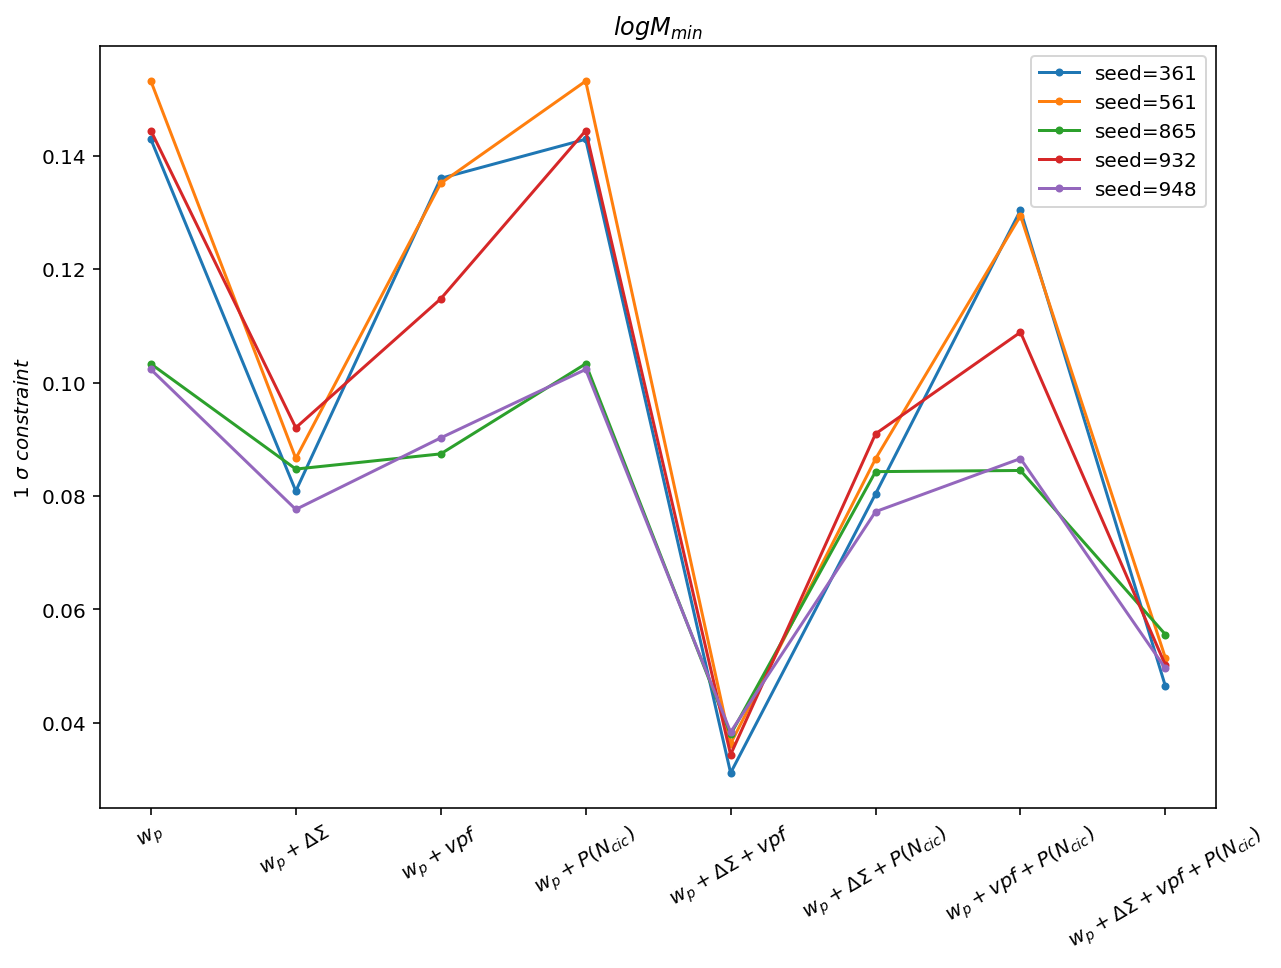

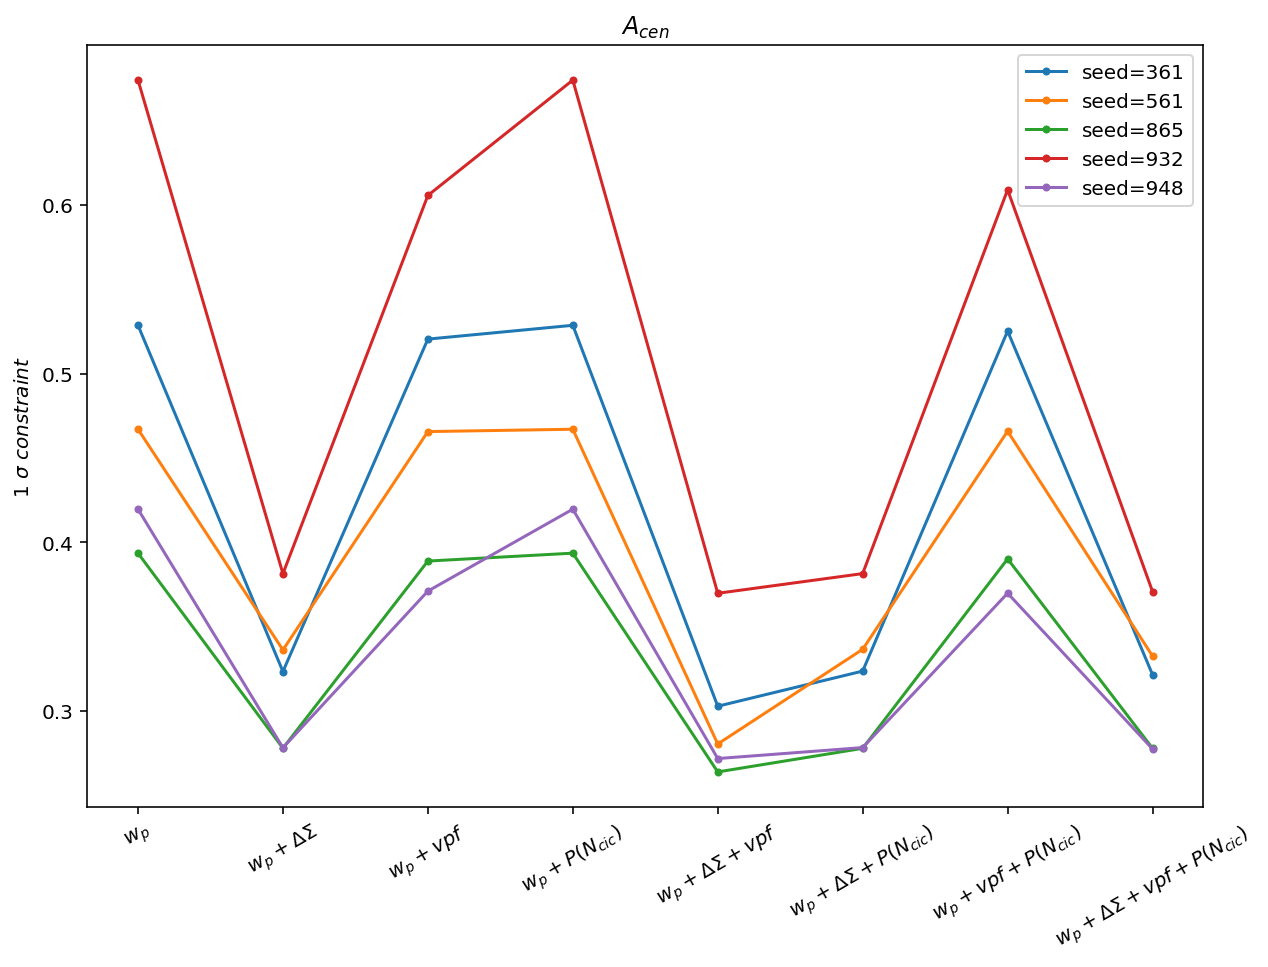

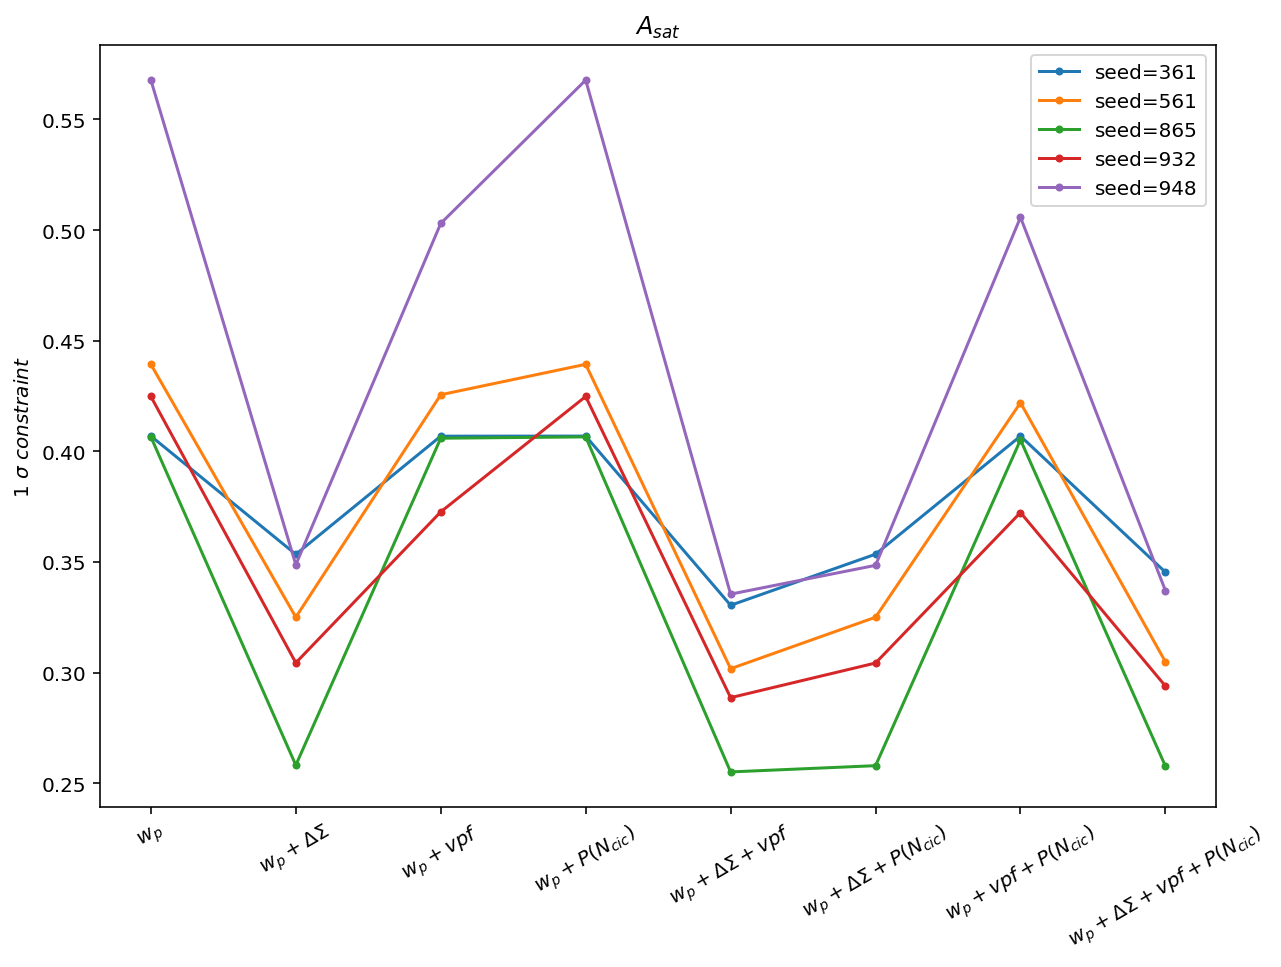

In [ ]:
for i in range(7):
    plt.figure(figsize=(10,7))
    plt.title(param_list[i])
    plt.xticks(range(1,9),comb_list,rotation=30)
    plt.plot(range(1,9),all_1sigma_361[:,i],'.-',label='seed=361')
    plt.plot(range(1,9),all_1sigma_561[:,i],'.-',label='seed=561')
    plt.plot(range(1,9),all_1sigma_865[:,i],'.-',label='seed=865')
    plt.plot(range(1,9),all_1sigma_932[:,i],'.-',label='seed=932')
    plt.plot(range(1,9),all_1sigma_948[:,i],'.-',label='seed=948')
    plt.ylabel(r'$1\ \sigma\ constraint$')
    plt.legend()